# Employee Turnover Prediction

## 1. Problem formulation

**1.1. Problem Formulation**

The objective of this project is to develop a Bayesian predictive model to forecast which employees are likely to leave their jobs in the near future. Employee turnover poses a significant challenge for organizations, impacting operational efficiency and increasing costs.

We assume that employees' decisions to leave are independent of each other, meaning that an employee's decision to leave depends solely on their own characteristics and is not directly related to the decisions of other employees. We are disregarding external factors that may change over time, such as changes in company policy, labor market fluctuations, etc., which could influence employees' decisions to leave.

**The aim of the project is to predict which employee is likely to leave the organization based on their demographic, professional, and psychological attributes.**

We believe that our model can be useful. The anticipated use cases of the proposed model are described below.

* **Human Resource Management**

    HR specialists can use the model to identify employees at risk of leaving, enabling the implementation of targeted retention strategies and minimizing the loss of key talents.

* **Workforce Planning**

    Managers can utilize the model's predictions for more effective human resource planning, allowing them to prepare for potential departures and prevent staffing shortages.

* **Decision Support**

    The company's management can use the model's results to understand the main factors influencing employee turnover, supporting decisions regarding employment policies and retention strategies.

* **HR Consulting**

    HR consultants can use the model to advise companies on improving employment policies, reducing turnover rates, and increasing employee satisfaction through more targeted actions.

**1.2. Data source**

Employee turnover results from various factors, including demographic information, job roles, industry type, and psychological characteristics. 

This Employee Turnover dataset is a real dataset shared from Edward Babushkin's blog used to predict an employee's risk of quitting. The dataset consists of 1129 records with the following features:

* **stag:** Employee's tenure at the company.
* **event:** Target variable indicating turnover (1 for leaving, 0 for staying).
* **gender**: Employee's gender (m for male, f for female).
* **age:** Employee's age.
* **industry:** Industry in which the employee works.
* **profession:** Employee's occupation.
* **traffic:** Commuting source, indicating how the employee gets to work.
* **coach:** Indicates whether the employee has a coach (yes or no).
* **head_gender:** Gender of the supervisor.
* **greywage:** Type of wage (white for regular wage).
* **way:** Mode of transportation to work (bus, car, etc.).
* **extraversion:** Employee's extraversion score.
* **independ:** Employee's independence score.
* **selfcontrol:** Employee's self-control score.
* **anxiety:** Employee's anxiety score.
* **novator:** Employee's innovativeness score.


Data has been downloaded from kaggle.

https://www.kaggle.com/datasets/davinwijaya/employee-turnover

## 2. Data preprocessing

**2.1. Data overview**

Firstly, let's print out our data to see sample of records that are there.

In [42]:
import pandas as pd

df = pd.read_csv("turnover.csv", encoding = "ISO-8859-1")
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


The data looks good at the first look, but we can get some more details about it to have overall look.

In [43]:
df.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


As we can see, the numerical data that desribes employee character like extraversion, anxiety, etc. are normalized in the values range 0 - 10 which is good. Also the 'age' column has values between 18 and 58 which sounds reasonable and makes us sure we have no outliers in the dataset. Column named 'event' has also proper values as it contains probability values for each employee. Now, when we are sure we have no outliers nor any other strange values here, let's see if there are some NaN's.  

In [44]:
df.isnull().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

**2.2. Categorical data encoding**

Now when we are sure that our numerical data are fine, we can take a look at the categorical ones. To make it usefull in our project we should firstly encode its values to make its type numerical. For this we can use `LabelEncoder` from `scikit-learn` library.

In [45]:
from sklearn.preprocessing import LabelEncoder

encoding_map = {}
for col in df.columns:
    if df[col].dtype == 'object':
        labels = df[col].unique()
        
        encoder = LabelEncoder()
        encoder = encoder.fit(df[col])
        df[col] = encoder.transform(df[col].astype(str))
        
        map_column_values = {label: num for label, num in zip(labels, encoder.transform(labels))}
        encoding_map[col] = map_column_values

print(encoding_map)

{'gender': {'m': 1, 'f': 0}, 'industry': {'Banks': 2, 'PowerGeneration': 8, 'Retail': 10, 'manufacture': 14, 'Consult': 4, 'State': 11, 'etc': 13, 'Building': 3, 'IT': 5, ' HoReCa': 0, 'Telecom': 12, 'Pharma': 7, 'Mining': 6, 'transport': 15, 'Agriculture': 1, 'RealEstate': 9}, 'profession': {'HR': 6, 'Commercial': 2, 'Marketing': 9, 'etc': 13, 'Sales': 11, 'BusinessDevelopment': 1, 'Finanñe': 5, 'Teaching': 12, 'manage': 14, 'IT': 7, 'Law': 8, 'Consult': 3, 'Engineer': 4, 'PR': 10, 'Accounting': 0}, 'traffic': {'rabrecNErab': 4, 'empjs': 2, 'youjs': 7, 'referal': 6, 'advert': 1, 'KA': 0, 'recNErab': 5, 'friends': 3}, 'coach': {'no': 1, 'yes': 2, 'my head': 0}, 'head_gender': {'f': 0, 'm': 1}, 'greywage': {'white': 1, 'grey': 0}, 'way': {'bus': 0, 'car': 1, 'foot': 2}}


Now the dataset is fully ready to use in our modelling. We can also see the encoding map placed above to know which number represents which label in the original data. It will help us in better interpretation of the received results in the future. 

## 3. Model

## 4. Priors

In [46]:
sample_columns = ["age", "gender", "industry", "profession", "traffic", "coach", "head_gender", "greywage", "way"]
features_matrix = df[sample_columns].values

In [47]:
import numpy as np

normalized_features_matrix = np.array([v / np.linalg.norm(v) for v in features_matrix[:]])

In [ ]:
from cmdstanpy import CmdStanModel

stan_model = CmdStanModel(stan_file='stan/prior.stan')

samples = stan_model.sample(
    data={
            "N": normalized_features_matrix.shape[0],
            "K": normalized_features_matrix.shape[1],
            "X": normalized_features_matrix
        },
    fixed_param=True,
    iter_sampling=1000,
    iter_warmup=1,
    chains=1
)

In [73]:
times = df["stag"].values
times_sim = samples.stan_variable("y_sim")
times_sim_mean = times_sim.mean(axis=0)
times_sim_median = np.median(times_sim, axis=0)

In [ ]:
times.min(), times.max()

In [78]:
times_sim.min(), times_sim.max()

(6.14554e-07, 37.3865)

In [ ]:
times_sim_mean.min(), times_sim_mean.max()

In [ ]:
times_sim_median.min(), times_sim_median.max()

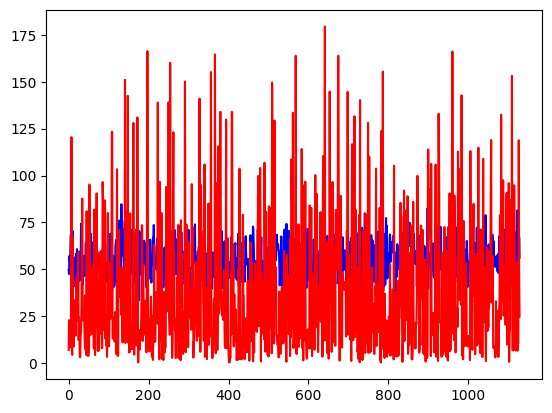

In [55]:
import matplotlib.pyplot as plt

plt.plot(times_sim_mean, 'b')
plt.plot(times, 'r')
plt.show()

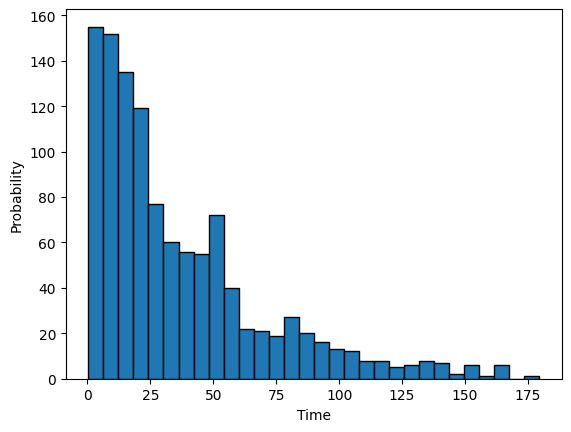

In [57]:
plt.hist(times, bins=30, edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.show()

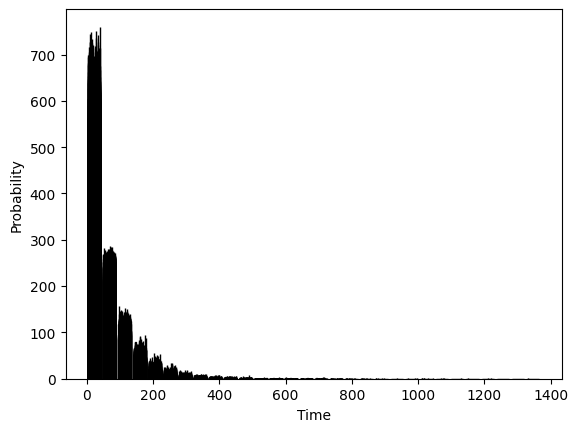

In [59]:
plt.hist(times_sim, bins=30, edgecolor="black")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.show()

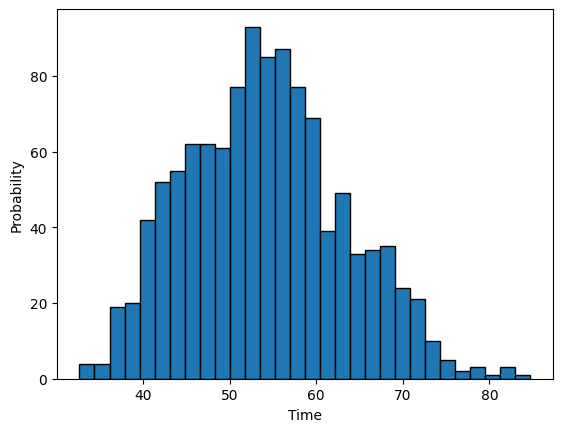

In [71]:
plt.hist(times_sim_mean, bins=30, edgecolor="black")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.show()

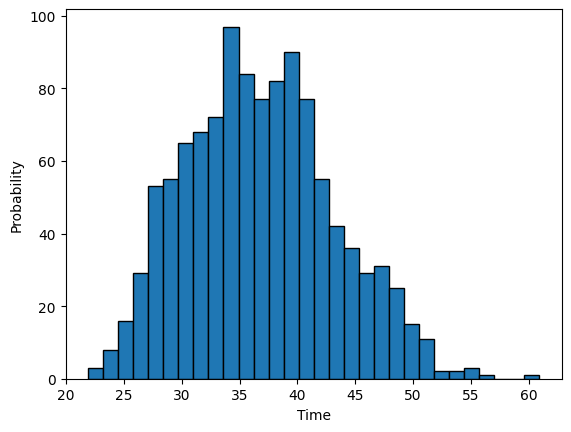

In [61]:
plt.hist(times_sim_median, bins=30, edgecolor="black")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.show()

In [29]:
# try:
#     import lifelines
# except ModuleNotFoundError:
#     !pip install lifelines
#     import lifelines

## 5. Posterior analysis of the first model

## 6. Posterior analysis of the second model

## 7. Model comparison